# Supervised Machine Learning Algorithms
-Study Notes by Sanjib Katuwal

### Classification and Regression
These are the two major types of supervised machine learning problems. In classification, the goal is to predict a class label, from a predefined list of possibilities. However, for regression tasks, the goal is to predict a continuous number. In regression, there will be a continuity between possible outcomes. In Classification problem, there is no continuity, it is either this or that.

### Generalization, Overfitting, and Underfitting
The task of building a model on the basis of training data and then be able to predict accurately on new unseen data is called generalization. Usually, intuitively, we can say that a simple model is better to use for generalization. If a model built is too complex for the amount of data we have in our hand, it is called overfitting. On the other hand, if a model is too simple, it is called underfitting. The sweet spot lies in between. Also, it is better to have more data. Never underestimate the power of more data.

In [13]:
# Some necessary imports
import matplotlib.pyplot as plt
import mglearn
import numpy as np

### Generating Datasets

X.shape: (26, 2)


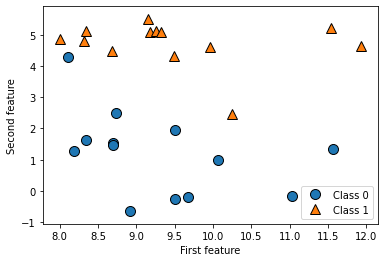

In [6]:
# generate dataset for two class classification problem
X, y = mglearn.datasets.make_forge()
# plotting the dataset
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

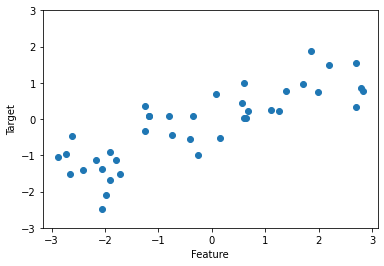

In [8]:
# generate dataset for a regression problem
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [10]:
# real World Data set : Wisconsin Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [14]:
print("Sample counts per class:\n{}".format(
{n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [15]:
# looking for features
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
print("DESCR:\n{}".format(cancer.DESCR))

DESCR:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Me

In [17]:
# Real World Regression Dataset: Boston Housing Data Set
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Shape for Boston housing: {}".format(boston.data.shape))

Data Shape for Boston housing: (506, 13)


In [18]:
print("DESCR:\n{}".format(boston.DESCR))

DESCR:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRA

In [22]:
# The extended feature Engineered Data for the Boston Housing. 91 features are added: 13*12/2+13
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## Algorithm: k-Nearest Neighbors
The k-NN is the simplest machine learning algorithm. In its simpled model (n_neighbor=1), it considers exactly one  nearest neighbor to make predictions.

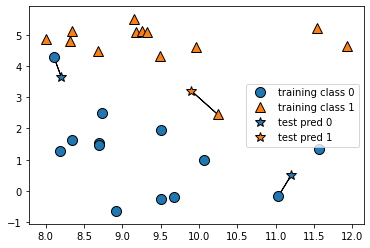

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

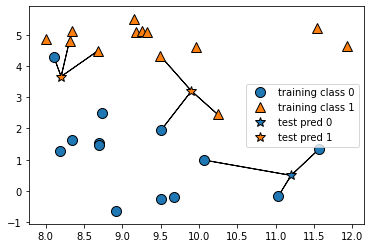

In [29]:
# considering instead 3-nearest neighbors. While using multiple neighbors, democracy comes into play. You are what your
# neighbors vote you to be.
mglearn.plots.plot_knn_classification(n_neighbors=3)

Before using any data set, first you want to evaluate the general performace of the data. We will do this now for the forge dataset.

In [31]:
# Split the data into train and test data sets
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
# import the Kneighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [33]:
# now we fit the data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [35]:
print("Test set accuracy: {:.3f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.857


### Analyzing KNeighborsClassifier

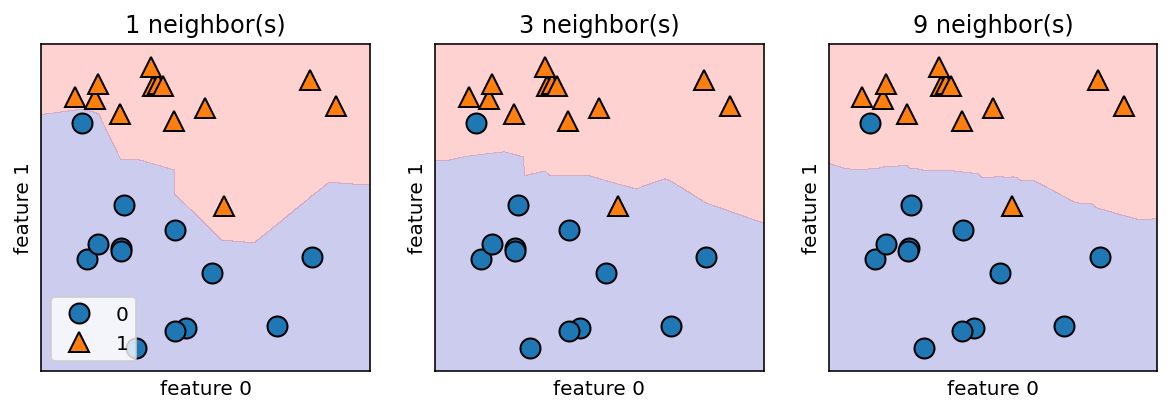

In [67]:
# Showing decision boundary
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) 

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.2)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### Understanding model Complexity using Breast Cancer Data

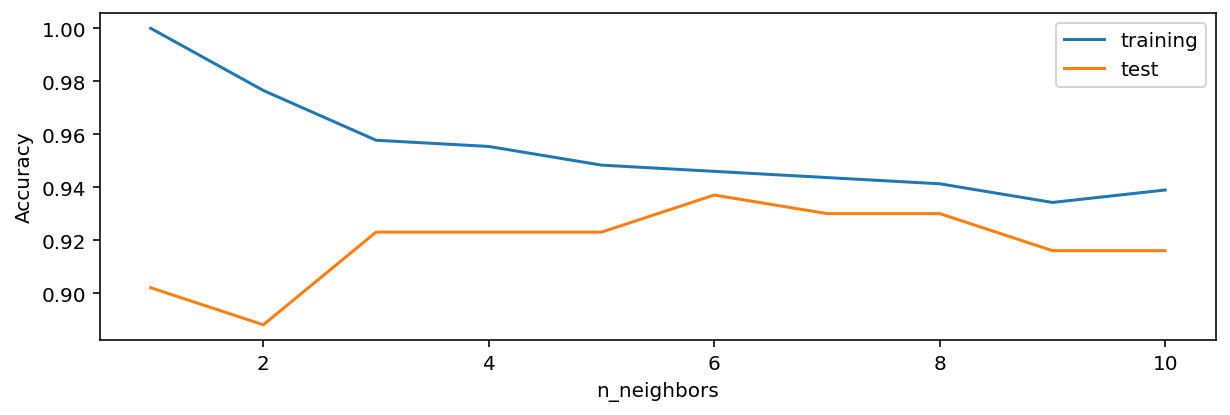

In [69]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#trying n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training')
plt.plot(neighbors_settings, test_accuracy, label='test')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()